Import the libraries that we need for the project, OpenCV, NumPy and MatPlotLib

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

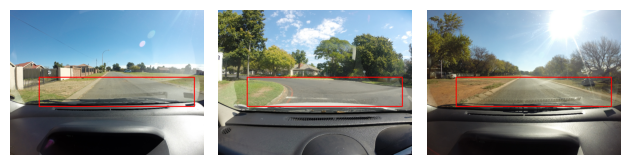

In [20]:
#this function draw a rectangle in the part of the image that we consider the ROI (Region Of Interest)
def draw_rect(image,roi_coords):
    output = cv2.resize(image, (1000, 750))
    # Define the angles of the rectangle 
    # (x1, y1) -> top left corner
    # (x2, y2) -> bottom right corner
    start_point = (roi_coords[0], roi_coords[1])
    end_point = (roi_coords[2], roi_coords[3])
    color = (0, 0, 255)
    thickness = 3

    # draw on image
    cv2.rectangle(output, start_point, end_point, color, thickness)
    return output

#Define the ROI, excluding lower part comprending the dashboard of the car, the upper part with the sky and the lateral parts
roi_coords = (150, 350, 950, 500) #(x1,y1,x2,y2)
_, axes = plt.subplots(1, 3)
axes[0].imshow(cv2.cvtColor(draw_rect(cv2.imread("test_images/test4.jpg"),roi_coords),cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(draw_rect(cv2.imread("test_images/test5.jpg"),roi_coords),cv2.COLOR_BGR2RGB))
axes[2].imshow(cv2.cvtColor(draw_rect(cv2.imread("test_images/test6.jpg"),roi_coords),cv2.COLOR_BGR2RGB))

for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()

Show the ROI in the selected image

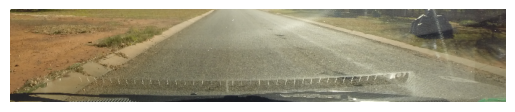

In [21]:
image = cv2.imread("test_images/test6.jpg")
image = cv2.resize(image, (1000,750))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# y1:y2 ,   x1:x2
roi = image[roi_coords[1]:roi_coords[3], roi_coords[0]:roi_coords[2]]
plt.axis('off')
plt.imshow(roi)

Compute the mean color and the standard deviation in the ROI

In [22]:
mean_color = np.mean(roi, axis=(0, 1))
std_color = np.std(roi, axis=(0, 1))

print(mean_color)
print(std_color)

[139.65849167 130.18374167 102.04449167]
[37.34965949 36.29271089 34.87717538]


Define the range of colors in the ROI that we retain are from the road and show it

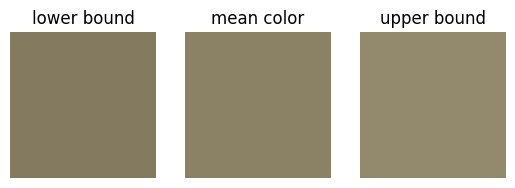

In [23]:
lower_bound=np.clip(mean_color - 0.3 * std_color, 0, 255)
lower_bound_image = np.full((100, 100, 3), lower_bound, dtype=np.uint8)

upper_bound=np.clip(mean_color + 0.3 * std_color, 0, 255)
upper_bound_image = np.full((100, 100, 3), upper_bound, dtype=np.uint8)


mean_color_image = np.full((100, 100, 3), mean_color, dtype=np.uint8)
_,axes=plt.subplots(1,3)
axes[0].imshow(lower_bound_image)
axes[0].set_title("lower bound")
axes[1].imshow(mean_color_image)
axes[1].set_title("mean color")
axes[2].imshow(upper_bound_image)
axes[2].set_title("upper bound")

for ax in axes: ax.axis('off')
plt.show()

Create a mask with the colors defined above and extract the road from the image

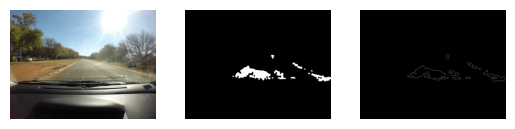

-1

In [24]:
mask = cv2.inRange(image, lower_bound, upper_bound)

# Applica operazioni morfologiche per pulire la maschera
kernel = np.ones((8, 8), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Riempie piccoli buchi
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Rimuove il rumore

# Applica Canny per rilevare i contorni
edges = cv2.Canny(mask, 50, 150)

# Mostra i risultati
_, axes = plt.subplots(1,3)
axes[0].imshow(image)
axes[1].imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB))
axes[2].imshow(cv2.cvtColor(edges,cv2.COLOR_BGR2RGB))

for ax in axes: ax.axis('off')
plt.show()

cv2.imshow("",edges)
cv2.waitKey(0)